Here we want to change the values of rainfall to a more realistic measure (within 1mm), play with both the threshold for the rainfall events as well as testing multiple thresholds. Also we want to change several existing variables: month, for instance, should be one-hot encoded instead of label encoded. Time should likely also get some kind of change-- hour could maybe be categorized (morning, day, night or something) and one-hotted as well. <-- pandas get_dummies 

We can also test for differences in means for different thresholds


Other ideas?

# Imports and fixes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import pandas_profiling as pdp

In [2]:
data = pd.read_csv('data.csv')
data['sss_change'] = data['sss'].diff().fillna(0)
data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,...,scaled_dir,scaled_spd,scaled_sst,pct_change,pct_c_scaled,set,sst_pct_change,dir_pct_change,spd_pct_change,sss_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,...,-0.223661,-1.120622,2.145583,0.000000,0.000000,Spurs1,0.000000,0.000000,0.000000,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,...,-0.285520,-0.968037,2.081695,-0.000025,-0.031722,Spurs1,-1.374910,0.135314,0.293850,-0.000926
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,...,-0.345568,-0.358302,2.028844,0.000016,0.022122,Spurs1,-1.141199,0.126846,1.265220,0.000621
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,...,-0.369664,-0.519302,1.982482,0.000017,0.022846,Spurs1,-1.003867,0.091158,-0.334265,0.000642
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,...,-0.403631,-0.605983,1.942557,0.000041,0.054988,Spurs1,-0.866609,0.098501,-0.227134,0.001566


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9133 entries, 0 to 9132
Data columns (total 24 columns):
new_time          9133 non-null object
time              9133 non-null float64
sss               9133 non-null float64
sst               9133 non-null float64
wind_spd          9133 non-null float64
wind_dir          9133 non-null float64
precip            9133 non-null float64
cum_precip3       9133 non-null float64
cum_precip6       9133 non-null float64
year              9133 non-null int64
month             9133 non-null int64
day               9133 non-null int64
hour              9133 non-null int64
scaled_sss        9133 non-null float64
scaled_dir        9133 non-null float64
scaled_spd        9133 non-null float64
scaled_sst        9133 non-null float64
pct_change        9133 non-null float64
pct_c_scaled      9133 non-null float64
set               9133 non-null object
sst_pct_change    9133 non-null float64
dir_pct_change    9133 non-null float64
spd_pct_change    9133 

In [4]:
data.drop(['scaled_sss','scaled_dir','scaled_spd','scaled_sst','set','spd_pct_change',
          'dir_pct_change','sst_pct_change','pct_change','pct_c_scaled'],axis=1,inplace=True)
data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566


In [5]:
data['wind_change'] = data['wind_spd'].diff().fillna(0)
print(data[data['precip'] < 0.01].shape[0])
data.head()

8707


,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000,0.000000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926,0.340064
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621,1.358904
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642,-0.358818
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566,-0.193182


## Fixing Rainfall Measures

In [6]:
data.loc[(data['precip'] <= 0.01), 'precip'] = 0.0
data.loc[(data['precip'] <= 0.01)]['precip'].sum()

0.0

In [7]:
data.iloc[1419]

new_time       2012-11-12 23:30:00.000028800
time                                  735186
sss                                  37.6063
sst                                  25.3023
wind_spd                             9.91813
wind_dir                             175.172
precip                                     0
cum_precip3                         0.136801
cum_precip6                          4.89697
year                                    2012
month                                     11
day                                       12
hour                                      23
sss_change                      -0.000288769
wind_change                       -0.0626496
Name: 1419, dtype: object

In [8]:
#data.loc[((data.precip > 0) &  (data.precip < 0.1 )), 'precip'] = 0.1
data.precip = np.around(data.precip,1)
data.precip.sort_values(ascending=False)

2947    35.4
268     31.5
2935    23.4
274     21.8
2496    18.5
1013    18.2
277     17.5
8727    14.1
4303    13.9
1421    13.3
1422    12.8
300     12.4
3334    12.0
2948    11.6
3377    11.6
1657    11.4
8726     9.7
5619     8.8
3339     8.6
1975     8.6
8952     7.6
2959     7.5
3898     6.9
1974     6.6
1012     6.6
3335     6.2
8725     6.1
1571     6.0
270      6.0
3383     5.9
        ... 
6043     0.0
6042     0.0
6041     0.0
6040     0.0
6038     0.0
6064     0.0
6037     0.0
6036     0.0
6035     0.0
6034     0.0
6033     0.0
6032     0.0
6046     0.0
6047     0.0
6048     0.0
6049     0.0
6050     0.0
6052     0.0
6053     0.0
6054     0.0
6055     0.0
6056     0.0
6057     0.0
6058     0.0
6059     0.0
6060     0.0
6061     0.0
6062     0.0
6063     0.0
0        0.0
Name: precip, Length: 9133, dtype: float64

In [9]:
data[(data['precip'] < 0.1)]['precip'].sort_values(ascending=False)

9132    0.0
3130    0.0
3136    0.0
3135    0.0
3134    0.0
3133    0.0
3132    0.0
3131    0.0
3129    0.0
3085    0.0
3128    0.0
3127    0.0
3126    0.0
3125    0.0
3124    0.0
3123    0.0
3137    0.0
3139    0.0
3140    0.0
3141    0.0
3142    0.0
3143    0.0
3144    0.0
3145    0.0
3146    0.0
3149    0.0
3150    0.0
3151    0.0
3152    0.0
3153    0.0
       ... 
6137    0.0
6138    0.0
6139    0.0
6140    0.0
6141    0.0
6142    0.0
6143    0.0
6144    0.0
6145    0.0
6146    0.0
6147    0.0
6148    0.0
6149    0.0
6151    0.0
6166    0.0
6152    0.0
6153    0.0
6154    0.0
6155    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
6164    0.0
6165    0.0
0       0.0
Name: precip, Length: 8745, dtype: float64

# One hot encoding

In [57]:
new_data = data.copy()
new_data['season'] = new_data['month'].copy()
new_data.loc[((new_data.season <=2 ) |  (new_data.season > 11)), 'season'] = 'Winter'
new_data.loc[(new_data.season ==3), 'season'] = 'Spring'
new_data.loc[(new_data.season ==4), 'season'] = 'Spring'
new_data.loc[(new_data.season ==5), 'season'] = 'Spring'
new_data.loc[(new_data.season ==6), 'season'] = 'Summer'
new_data.loc[(new_data.season ==7), 'season'] = 'Summer'
new_data.loc[(new_data.season ==8), 'season'] = 'Summer'
new_data.loc[(new_data.season ==9), 'season'] = 'Fall'
new_data.loc[(new_data.season ==10), 'season'] = 'Fall'
new_data.loc[(new_data.season ==11), 'season'] = 'Fall'


# new_data.loc[((new_data.hour >= 6) & (new_data.hour <18)), 'hour'] = 'Day'
# new_data.loc[new_data.hour != 'Day', 'hour'] = 'Night'

#new_data.loc[((new_data.hour >=11) & (new_data.hour<=16)), 'hour'] = 'Night'
#new_data.loc[(new_data.hour ), 'season'] = 'Fall'

#new_data.loc[((new_data.season >= 6 ) &  (new_data.season <= 8)), 'season'] = 'Summer'
#new_data.loc[((new_data.season > 8 ) &  (new_data.season <= 11)), 'season'] = 'Fall'

# months = {'1': 'January', '2':'February', '3':'March','4':'April','5': 'May', '6':'June', '7':'July','8':'August',
#          '9': 'September', '10':'October', '11':'November','12':'December',}
# new_data['month'] = new_data['month'].replace(months)
# new_data['hour'].replace(12,'Day', inplace=True)
# new_data['hour'].replace(13,'Day', inplace=True)
# new_data['hour'].replace(14,'Day', inplace=True)
# new_data['hour'].replace(15,'Day', inplace=True)
# new_data['hour'].replace(16,'Day', inplace=True)
# new_data['hour'].replace(17,'Day', inplace=True)
# new_data['hour'].replace(18,'Evening', inplace=True)
# new_data['hour'].replace(19,'Evening', inplace=True)
# new_data['hour'].replace(20,'Evening', inplace=True)
# new_data['hour'].replace(21,'Evening', inplace=True)
# new_data['hour'].replace(22,'Evening', inplace=True)
# new_data['hour'].replace(23,'Evening', inplace=True)
# new_data['hour'].replace(0,'Night', inplace=True)
# new_data['hour'].replace(1,'Night', inplace=True)
# new_data['hour'].replace(2,'Night', inplace=True)
# new_data['hour'].replace(3,'Night', inplace=True)
# new_data['hour'].replace(4,'Night', inplace=True)
# new_data['hour'].replace(5,'Night', inplace=True)

print(new_data.hour.unique())
new_data['season'].unique()

[20 21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


array(['Fall', 'Winter', 'Spring', 'Summer'], dtype=object)

In [58]:
new_data['mnth_sin'] = np.sin((new_data.month-1)*(2.*np.pi/12))
new_data['mnth_cos'] = np.cos((new_data.month-1)*(2.*np.pi/12))
new_data['hr_sin'] = np.sin(new_data.hour*(2.*np.pi/24))
new_data['hr_cos'] = np.cos(new_data.hour*(2.*np.pi/24))

In [61]:
new_data.hr_sin.max()

1.0

In [62]:
new_data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change,season,mnth_sin,mnth_cos,hr_sin,hr_cos
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,20,0.000000,0.000000,Fall,-0.866025,-0.5,-0.866025,0.500000
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,21,-0.000926,0.340064,Fall,-0.866025,-0.5,-0.707107,0.707107
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,22,0.000621,1.358904,Fall,-0.866025,-0.5,-0.500000,0.866025
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,23,0.000642,-0.358818,Fall,-0.866025,-0.5,-0.258819,0.965926
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,0,0.001566,-0.193182,Fall,-0.866025,-0.5,0.000000,1.000000


## Trying to take differential...

In [63]:
slope = pd.Series(np.gradient(new_data.sss), new_data.new_time, name='slope')

In [64]:
slope = pd.DataFrame(slope).reset_index()

In [65]:
new_data['differential'] = slope['slope']

In [66]:
print(slope.shape)
slope.head(3)

(9133, 2)


,new_time,slope
0,2012-09-14 20:30:00.000028800,-0.000926
1,2012-09-14 21:29:59.999971200,-0.000153
2,2012-09-14 22:30:00.000000000,0.000631


In [18]:
new_data.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,month,day,hour,sss_change,wind_change,season,mnth_sin,mnth_cos,differential
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,9,14,Night,0.000000,0.000000,Fall,-0.866025,-0.5,-0.000926
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,9,14,Night,-0.000926,0.340064,Fall,-0.866025,-0.5,-0.000153
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,9,14,Night,0.000621,1.358904,Fall,-0.866025,-0.5,0.000631
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,9,14,Night,0.000642,-0.358818,Fall,-0.866025,-0.5,0.001104
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,9,15,Night,0.001566,-0.193182,Fall,-0.866025,-0.5,0.001236


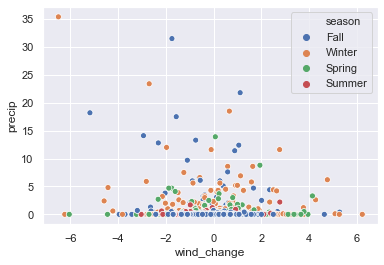

In [19]:
sns.set()
sns.scatterplot(x='wind_change', y='precip',data=new_data, hue='season')

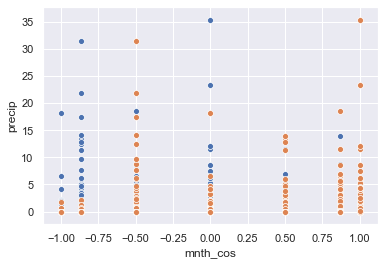

In [21]:
sns.scatterplot(x='mnth_sin', y='precip', data=new_data)
sns.scatterplot(x='mnth_cos', y='precip', data=new_data)

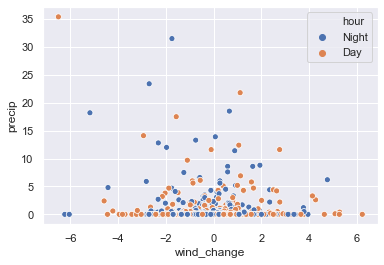

In [21]:
sns.scatterplot(x='wind_change', y='precip',data=new_data, hue='hour')

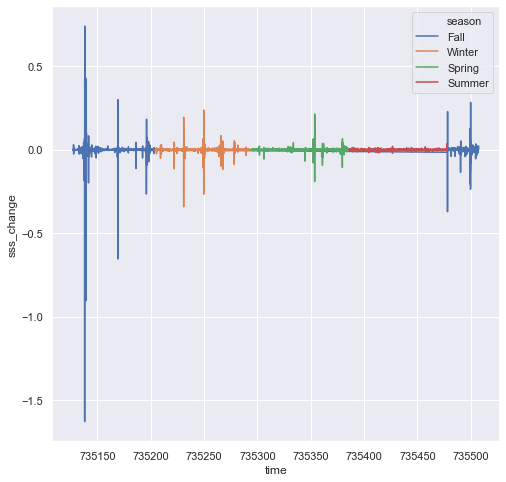

In [31]:
plt.figure(figsize=(8,8))
sns.lineplot(x='time',y='sss_change',data=new_data, hue='season')

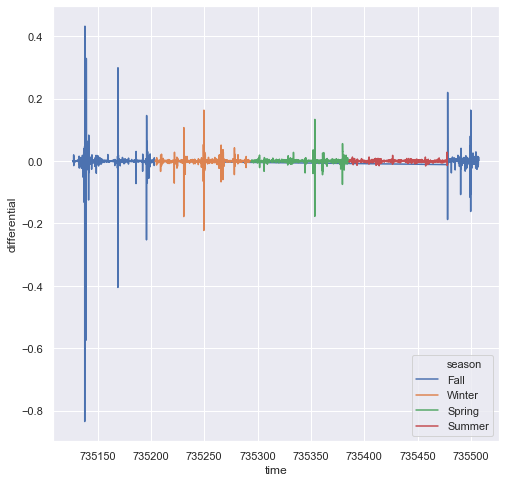

In [30]:
plt.figure(figsize=(8,8))
sns.lineplot(x='time',y='differential',data=new_data, hue='season')

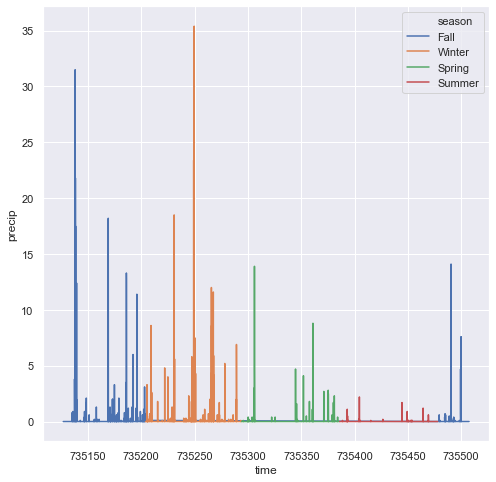

In [46]:
plt.figure(figsize=(8,8))
sns.lineplot(x='time',y='precip',data=new_data, hue='season')

In [18]:
new_data.groupby('hour')[['precip','sss_change','sst','wind_change','differential']].agg(['mean','max','std'])

precip                 sss_change                            sst  \
           mean   max       std       mean       max       std       mean   
hour                                                                        
Day    0.068201  35.4  0.847724  -0.000077  0.426465  0.021734  24.777489   
Night  0.087505  31.5  0.928305   0.000026  0.739762  0.033585  24.793833   

                           wind_change                     differential  \
             max       std        mean       max       std         mean   
hour                                                                      
Day    29.314786  1.442669    0.001055  6.229702  0.685571    -0.000068   
Night  30.004906  1.448029   -0.001039  4.766340  0.617668     0.000017   

                           
            max       std  
hour                       
Day    0.328839  0.017249  
Night  0.432195  0.023580

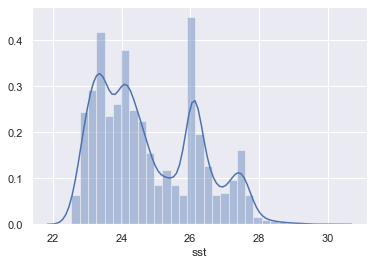

In [32]:
sns.distplot(new_data['sst'])

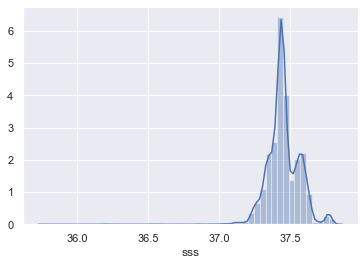

In [33]:
sns.distplot(new_data['sss'])

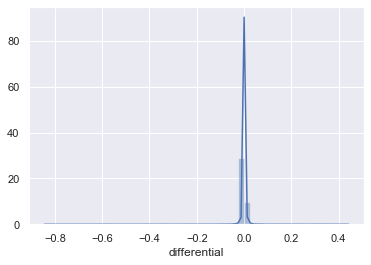

In [34]:
sns.distplot(new_data['differential'])

In [23]:
columns = ['season','hour']
new_enc = pd.get_dummies(new_data, columns=columns, drop_first=False)
new_enc.head()

,new_time,time,sss,sst,wind_spd,wind_dir,precip,cum_precip3,cum_precip6,year,...,wind_change,mnth_sin,mnth_cos,differential,season_Fall,season_Spring,season_Summer,season_Winter,hour_Day,hour_Night
0,2012-09-14 20:30:00.000028800,735126.854167,37.768217,27.886503,3.171527,-70.402566,0.0,0.0,0.0,2012,...,0.000000,-0.866025,-0.5,-0.000926,1,0,0,0,0,1
1,2012-09-14 21:29:59.999971200,735126.895833,37.767291,27.794171,3.511590,-78.652231,0.0,0.0,0.0,2012,...,0.340064,-0.866025,-0.5,-0.000153,1,0,0,0,0,1
2,2012-09-14 22:30:00.000000000,735126.937500,37.767912,27.717789,4.870495,-86.660419,0.0,0.0,0.0,2012,...,1.358904,-0.866025,-0.5,0.000631,1,0,0,0,0,1
3,2012-09-14 23:30:00.000028800,735126.979167,37.768554,27.650786,4.511677,-89.874044,0.0,0.0,0.0,2012,...,-0.358818,-0.866025,-0.5,0.001104,1,0,0,0,0,1
4,2012-09-15 00:29:59.999971200,735127.020833,37.770119,27.593085,4.318494,-94.403915,0.0,0.0,0.0,2012,...,-0.193182,-0.866025,-0.5,0.001236,1,0,0,0,0,1


# Thresholds

In [67]:
rain = new_enc[new_enc['precip'] >0]['precip']
print(rain.median())
rain.mean()

0.5


1.8327319587628867

In [68]:
new_enc[new_enc['precip']>0]['month'].value_counts('all').sort_values()

7     0.007732
4     0.025773
6     0.030928
8     0.041237
3     0.046392
5     0.056701
10    0.085052
2     0.103093
9     0.123711
12    0.126289
11    0.149485
1     0.203608
Name: month, dtype: float64

In [69]:
new_enc[new_enc['precip']>0]['hour_Night'].value_counts('all').sort_values()

0    0.453608
1    0.546392
Name: hour_Night, dtype: float64

In [70]:
new_enc.groupby('year')['month'].value_counts()

year  month
2012  10       744
      12       744
      11       720
      9        388
2013  1        744
      3        744
      5        744
      7        744
      8        744
      4        720
      6        720
      9        705
      2        672
Name: month, dtype: int64

In [28]:
seasons = ['season_Winter','season_Spring','season_Summer','season_Fall']
for i in seasons:
    print(i, new_enc[new_enc['precip']>0][i].value_counts('all'))

season_Winter 0    0.56701
1    0.43299
Name: season_Winter, dtype: float64
season_Spring 0    0.871134
1    0.128866
Name: season_Spring, dtype: float64
season_Summer 0    0.920103
1    0.079897
Name: season_Summer, dtype: float64
season_Fall 0    0.641753
1    0.358247
Name: season_Fall, dtype: float64


In [29]:
new_enc[new_enc['precip']>0]['season_Winter'].value_counts('all').sort_values()

1    0.43299
0    0.56701
Name: season_Winter, dtype: float64

So from the start, pretty weird that for rain values > 0, only 8% of values are in the summer but 43.34% are in the winter? 

In [26]:
data.groupby(['month','year'])['precip'].agg(['mean','max']).sort_values(by='mean', ascending=False)

,,mean,max
month,year,,
9,2012,0.285567,31.5
1,2013,0.252554,35.4
11,2012,0.120000,13.3
12,2012,0.102419,18.5
2,2013,0.095536,11.6
9,2013,0.069362,14.1
10,2012,0.065591,18.2
3,2013,0.041263,13.9
5,2013,0.039516,8.8


In [71]:
ordered_rain = rain.sort_values(ascending=True)
new_sum = np.array(ordered_rain).cumsum()
scaled_sum = new_sum/new_sum.max()
first = len(scaled_sum[scaled_sum >= 0.5])
second = len(scaled_sum[scaled_sum >= 0.25])
#new_sum[-11:]
print(len(ordered_rain))
print(first)
print(second)
print(ordered_rain[-second:(-second +1)])

ordered_rain[-first:(-first +1)]


388
26
70
3328    2.4
Name: precip, dtype: float64


3335    6.2
Name: precip, dtype: float64

In [77]:
low_thres = new_enc[new_enc['precip'] < 3.766850]
thres = new_enc[new_enc['precip'] >= 3.766850]
threshold = [2 if i >= 6.2 else 1 if i >=2.3 else 0 for i in new_enc['precip']]
new_enc['thres'] = threshold
new_data['thres'] = threshold
print(low_thres[['sss_change','sss','sst','wind_spd']].agg(['mean','median']))
print(thres[['sss_change','sss','sst','wind_spd']].agg(['mean','median']))

        sss_change        sss        sst  wind_spd
mean      0.000653  37.453298  24.787120  5.669648
median    0.000167  37.443424  24.409049  5.821573
        sss_change        sss        sst  wind_spd
mean     -0.118638  37.290929  24.532075  5.562377
median   -0.047402  37.356062  23.937423  5.816297


In [29]:
new_enc.groupby('thres')['precip'].agg(['sum','mean','median','std'])

,sum,mean,median,std
thres,,,,
0,168.5,0.018598,0.0,0.143219
1,186.1,3.959574,4.0,1.160708
2,356.5,13.711538,11.8,7.472634


In [30]:
new_enc['thres'].unique()

array([0, 1, 2], dtype=int64)

In [73]:
new_enc['temp_change'] = new_enc['sst'].diff().fillna(0)
new_enc['temp_change'].isna().sum()

0

In [32]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night', 'thres',
       'temp_change'],
      dtype='object')

In [33]:
new_enc2 = new_enc.copy()
new_enc2['sss_change'] = new_enc2['sss_change'].shift(-1).fillna(0)
new_enc2['wind_change'] = new_enc2['wind_change'].shift(-1).fillna(0)
new_enc2['temp_change'] = new_enc2['temp_change'].shift(-1).fillna(0)

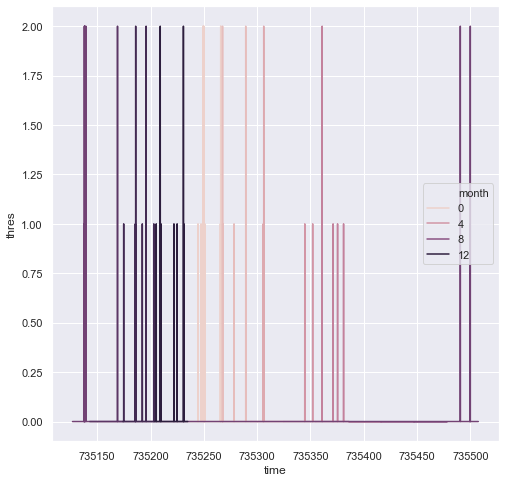

In [59]:
plt.figure(figsize=(8,8))
sns.lineplot(x='time',y='thres',data=new_enc, hue='month')

In [75]:
new_data.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'hour',
       'sss_change', 'wind_change', 'season', 'mnth_sin', 'mnth_cos', 'hr_sin',
       'hr_cos', 'differential'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
X = new_data.drop(['cum_precip3','cum_precip6','thres','time','new_time', 'month',
                 'wind_dir','precip','hour','season'],axis=1)
y=new_data['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
import warnings 
warnings.filterwarnings('ignore')
log = LogisticRegression()
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
parameters = {'log__C': [1, 10, 50, 100], 'log__multi_class': ['multinomial','auto'],
               'log__solver': ['lbfgs','sag','saga'], 'log__max_iter': [200,500],}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5)

grid.fit(X_train, y_train)
print("score = %3.4f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

from sklearn.metrics import confusion_matrix
pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred))

score = 0.9931
{'log__C': 1, 'log__max_iter': 200, 'log__multi_class': 'multinomial', 'log__solver': 'sag'}
[[2719    0    1]
 [  13    0    0]
 [   5    0    2]]


In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

steps1 = [('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500], 'forest__min_samples_split':[2,3,4],
               'forest__booster':['gbtree','dart'],'forest__grow_policy':['lossguide','depthwise'],
              'forest__max_bin':[128,256]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

KeyboardInterrupt: 

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree',grow_policy='lossguide',max_bin=128,
                    min_samples_split=2, n_estimators=200)

xgb.fit(X_train, y_train)
preddy = xgb.predict(X_test)
print(confusion_matrix(y_test, preddy))

[[2719    1    0]
 [  12    1    0]
 [   2    2    3]]


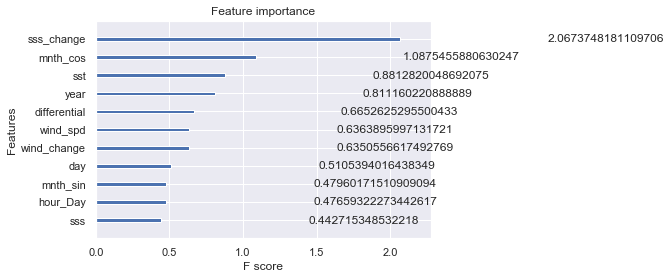

In [35]:
import xgboost
xgboost.plot_importance(xgb, importance_type='gain')

In [41]:
## So group 0 is below the threshold, group 1 is at or above
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
#Would need to merge things 
mc = MultiComparison(new_enc['sss'], new_enc['thres'])
result = mc.tukeyhsd()

mc1 = MultiComparison(new_enc['sss_change'], new_enc['thres'])
result1 = mc1.tukeyhsd()

mc2 = MultiComparison(new_enc['wind_spd'], new_enc['thres'])
result2 = mc2.tukeyhsd()

mc3 = MultiComparison(new_enc['wind_change'], new_enc['thres'])
result3 = mc3.tukeyhsd()

mc4 = MultiComparison(new_enc['sst'], new_enc['thres'])
result4 = mc4.tukeyhsd()

mc5 = MultiComparison(new_enc['wind_dir'], new_enc['thres'])
result5 = mc5.tukeyhsd()

mc6 = MultiComparison(new_enc['temp_change'], new_enc['thres'])
result6 = mc6.tukeyhsd()

mc7 = MultiComparison(new_enc['differential'], new_enc['thres'])
result7 = mc7.tukeyhsd()
 
print(result)
print('For Salinity', mc.groupsunique,'\n\n')

print(result1)
print('For Salinity Change', mc1.groupsunique,'\n\n')

print(result2)
print('For Wind Speed', mc2.groupsunique,'\n\n')

print(result3)
print('For Wind Change',mc3.groupsunique,'\n\n')

print(result4)
print('For Temperature',mc4.groupsunique,'\n\n')

print(result5)
print('For Wind Direction',mc5.groupsunique,'\n\n')

print(result6)
print('For Time Differential',mc6.groupsunique,'\n\n')

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0546 0.0021 -0.0923 -0.0168   True
     0      2  -0.2383  0.001 -0.2891 -0.1876   True
     1      2  -0.1838  0.001 -0.2469 -0.1206   True
----------------------------------------------------
For Salinity [0 1 2] 


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -0.0147 0.001 -0.0235 -0.0059   True
     0      2  -0.2209 0.001 -0.2327  -0.209   True
     1      2  -0.2061 0.001 -0.2209 -0.1914   True
---------------------------------------------------
For Salinity Change [0 1 2] 


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0755   0.9 -0.6887 0.8396  False
     

In [91]:
def label_ses(row):
    if row['season_Winter'] == 1:
        return 'Winter'
    if row['season_Spring'] == 1 :
        return 'Spring'
    if row['season_Summer'] == 1 :
        return 'Summer'
    if row['season_Fall'] == 1:
        return 'Fall'

In [92]:
new_enc['Seasons'] = new_enc.apply(lambda row: label_ses(row), axis=1)

In [93]:
mc = MultiComparison(new_enc['sss'], new_enc['Seasons'])
result = mc.tukeyhsd()

mc1 = MultiComparison(new_enc['sss_change'], new_enc['Seasons'])
result1 = mc1.tukeyhsd()

mc2 = MultiComparison(new_enc['wind_spd'], new_enc['Seasons'])
result2 = mc2.tukeyhsd()

mc3 = MultiComparison(new_enc['wind_change'], new_enc['Seasons'])
result3 = mc3.tukeyhsd()

mc4 = MultiComparison(new_enc['sst'], new_enc['Seasons'])
result4 = mc4.tukeyhsd()

mc5 = MultiComparison(new_enc['differential'], new_enc['Seasons'])
result5 = mc5.tukeyhsd()
 
print(result)
print('For Salinity', mc.groupsunique,'\n\n')

print(result1)
print('For Salinity Change', mc1.groupsunique,'\n\n')

print(result2)
print('For Wind Speed', mc2.groupsunique,'\n\n')

print(result3)
print('For Wind Speed Change',mc3.groupsunique,'\n\n')

print(result4)
print('For Temperature',mc4.groupsunique,'\n\n')

print(result5)
print('For Time Differential',mc5.groupsunique,'\n\n')

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  Fall Spring  -0.1468 0.001 -0.1533 -0.1403   True
  Fall Summer   -0.175 0.001 -0.1815 -0.1685   True
  Fall Winter   -0.103 0.001 -0.1095 -0.0964   True
Spring Summer  -0.0282 0.001  -0.035 -0.0214   True
Spring Winter   0.0438 0.001   0.037  0.0506   True
Summer Winter    0.072 0.001  0.0652  0.0788   True
---------------------------------------------------
For Salinity ['Fall' 'Spring' 'Summer' 'Winter'] 


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  Fall Spring  -0.0001   0.9 -0.0022  0.002  False
  Fall Summer  -0.0001   0.9 -0.0022 0.0021  False
  Fall Winter  -0.0001   0.9 -0.0022  0.002  False
Spring Summer      0.0   0.9 -0.0022 0.0022  False
Spring Winter     -0.0   0.9 -0.0022 0.0022  False
Summer Winter     -

In [94]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night', 'thres',
       'temp_change', 'Seasons'],
      dtype='object')

In [47]:
new_enc.to_csv('new_enc.csv')

In [48]:
new_enc[new_enc['season_Spring'] ==1]['month'].unique()

array([3, 4, 5], dtype=int64)

In [49]:
new_enc.groupby(['year','thres'])['Seasons'].value_counts()

year  thres  Seasons
2012  0      Fall       1832
             Winter      734
      1      Fall         11
             Winter        7
      2      Fall          9
             Winter        3
2013  0      Summer     2208
             Spring     2196
             Winter     1390
             Fall        700
      1      Winter       17
             Spring       10
             Fall          2
      2      Winter        9
             Fall          3
             Spring        2
Name: Seasons, dtype: int64

In [50]:
new_enc[new_enc['Seasons']=='Fall']['month'].unique()

array([ 9, 10, 11], dtype=int64)

In [51]:
print(new_enc[new_enc['season_Winter'] ==1].groupby('season_Winter')['thres'].value_counts())
print(new_enc[new_enc['season_Spring'] ==1].groupby('season_Spring')['thres'].value_counts())
print(new_enc[new_enc['season_Summer'] ==1].groupby('season_Summer')['thres'].value_counts())
new_enc[new_enc['season_Fall'] ==1].groupby('season_Fall')['thres'].value_counts()

season_Winter  thres
1              0        2124
               1          24
               2          12
Name: thres, dtype: int64
season_Spring  thres
1              0        2196
               1          10
               2           2
Name: thres, dtype: int64
season_Summer  thres
1              0        2208
Name: thres, dtype: int64


season_Fall  thres
1            0        2532
             1          13
             2          12
Name: thres, dtype: int64

So using multiple groups (group 0 as everything below a 33% rainfall value threshold, group 1 as the 33%-50%, and group 2 as the 50% and above values) we can see that there are significant differences in mean values for several fields and several thresholds

In [52]:
print(new_enc[new_enc['hour_Day'] ==1].groupby('hour_Day')['thres'].value_counts())
print(new_enc[new_enc['hour_Night'] ==1].groupby('hour_Night')['thres'].value_counts())

hour_Day  thres
1         0        4530
          1          24
          2           9
Name: thres, dtype: int64
hour_Night  thres
1           0        4530
            1          23
            2          17
Name: thres, dtype: int64


In [53]:
new_enc[new_enc['thres'] == 0][['sss','sst','wind_change','sss_change','differential']].median()

sss             37.443455
sst             24.411147
wind_change     -0.015505
sss_change       0.000169
differential     0.000144
dtype: float64

In [54]:
new_enc[new_enc['thres'] == 1][['sss','sst','wind_change','sss_change','differential']].median()

sss             37.413277
sst             23.989583
wind_change      0.127998
sss_change      -0.016222
differential    -0.014341
dtype: float64

In [55]:
new_enc[new_enc['thres'] == 2][['sss','sst','wind_change','sss_change','differential']].median()

sss             37.327668
sst             24.384788
wind_change     -0.339796
sss_change      -0.104618
differential    -0.065849
dtype: float64

In [56]:
new_enc[new_enc['hour_Day'] == 1][['sss','sst','wind_change','sss_change','differential']].median()

sss             37.442440
sst             24.400775
wind_change     -0.016955
sss_change       0.000232
differential     0.000229
dtype: float64

In [57]:
new_enc[new_enc['hour_Day'] == 0][['sss','sst','wind_change','sss_change','differential']].median()

sss             37.443875
sst             24.410080
wind_change     -0.012461
sss_change       0.000078
differential     0.000037
dtype: float64

# Models

In [58]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night', 'thres',
       'temp_change', 'Seasons'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
X = new_enc2.drop(['cum_precip3','cum_precip6','thres','time','new_time',
                 'wind_dir','precip'],axis=1)
y=new_enc2['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X.columns

Index(['sss', 'sst', 'wind_spd', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night',
       'temp_change'],
      dtype='object')

In [78]:
import warnings 
warnings.filterwarnings('ignore')
log = LogisticRegression()
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
parameters = {'log__C': [1, 10, 50, 100], 'log__multi_class': ['multinomial','auto'],
               'log__solver': ['lbfgs','sag','saga','newton-cg'], 'log__max_iter': [100, 200,500],}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5)

grid.fit(X_train, y_train)
print("score = %3.4f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

from sklearn.metrics import confusion_matrix
pred = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred))

score = 0.9927
{'log__C': 1, 'log__max_iter': 100, 'log__multi_class': 'multinomial', 'log__solver': 'sag'}
[[2719    0    1]
 [  13    0    0]
 [   6    0    1]]


In [ ]:
log = LogisticRegression(C=1, max_iter=100, multi_class='multinomial',solver='sag')
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)

In [79]:
steps1 = [('scaler', RobustScaler()), ('forest',  RandomForestClassifier(random_state=42))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__criterion':['gini','entropy'],'forest__max_depth':[2,3,4,None]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5, scoring='accuracy')

grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

score = 0.9927
{'forest__criterion': 'gini', 'forest__max_depth': None, 'forest__min_samples_split': 2, 'forest__n_estimators': 200}
[[2720    0    0]
 [  13    0    0]
 [   6    1    0]]


In [80]:
pred2 = grid1.best_estimator_.predict(X_train)
print(confusion_matrix(y_train, pred2))

[[6340    0    0]
 [   0   34    0]
 [   0    0   19]]


In [81]:
new_enc['thres'].value_counts()

0    9060
1      47
2      26
Name: thres, dtype: int64

In [86]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',verbosity=1))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
               'forest__booster':['gbtree','dart'],'forest__grow_policy':['lossguide','depthwise'],
              'forest__max_bin':[128,256]} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

KeyboardInterrupt: 

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist',booster='gbtree',n_estimators=200, grow_policy='lossguide',
                    max_bin=128, min_samples_split=2, subsample=0.5)

# steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

# pipeline1 = Pipeline(steps1)

# parameters1 = {'forest__n_estimators':[200,500,1000], 'forest__min_samples_split':[2,3,4],
#                'forest__criterion':['gini','entropy'],'forest__max_depth':[2,3,4]} 
    
#grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=5)

xgb.fit(X_train, y_train)
print("score = %3.5f" %(xgb.score(X_test,y_test)))
pred1 = xgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

score = 0.99380
[[2718    2    0]
 [  11    2    0]
 [   2    2    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2720
           1       0.33      0.15      0.21        13
           2       1.00      0.43      0.60         7

    accuracy                           0.99      2740
   macro avg       0.78      0.53      0.60      2740
weighted avg       0.99      0.99      0.99      2740



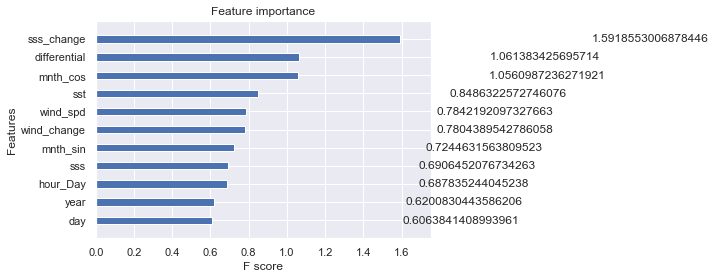

In [37]:
import xgboost
xgboost.plot_importance(xgb, importance_type='gain', height=0.4)

In [38]:
from sklearn.decomposition import PCA
pca = PCA(.97)
pca.fit(X)
csum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(csum>=.97)+1
d

3

In [93]:
first_set = X.sample(frac=.5, random_state=42)
second_set = X.sample(frac=.5, random_state=0)
third_set = X.sample(frac=.5, random_state=13)
first_y = y.sample(frac=.5, random_state=42)
second_y = y.sample(frac=.5, random_state=0)
third_y = y.sample(frac=.5, random_state=13)

In [97]:
r = [0]*16
r

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [110]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier()

import warnings
warnings.filterwarnings('ignore')
r = [0]*16
for n in range(0,62,2):
    X_set = X.sample(frac=0.5, random_state=n)
    y_set = y.sample(frac=0.5, random_state=n)
    
    rfe = RFE(model, 7)
    rfe = rfe.fit(X_set, y_set)

    #print(rfe.support_)
    #print(rfe.ranking_)
    r += rfe.ranking_
print(np.round(r/30, 2))
print(X.columns)

[ 1.03  1.1   1.13  7.53  2.2   2.13  1.03  1.03  1.03  7.73  8.03 10.07
  5.1   6.1   5.97  1.8 ]
Index(['sss', 'sst', 'wind_spd', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night',
       'temp_change'],
      dtype='object')


So sss, sst, wind_spd, sss_change, wind_change, differential... and seems like temp change? Following rules of CLT this should be sufficient, but can do more if needed for further validation

Order of removal: season_Summer, season_Spring, season_Fall, year, hour_Day, hour_Night, season_Winter, month, day

-- how to automate this?

In [65]:
log = LogisticRegression(C=1, max_iter=100, multi_class='multinomial',solver='sag')
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
coef = pipe.named_steps['log'].coef_
coef.shape

C:\Users\msc7850\AppData\Local\Continuum\anaconda3\envs\hmm\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(3, 16)

[ 4.0281574  -1.78729816 -2.24085924]


array([ 0.04096666,  0.20777786, -0.06990577, -0.41226101, -0.19575854,
       -0.03765184, -0.02574422,  0.01617994,  0.05890806,  0.42403688,
        0.47583506,  0.50211228,  0.39984086,  0.54937756, -0.54937756,
       -0.02657272])

In [117]:
mylist = [1, 4, 0, 3, 2]
mylist.remove(max(mylist))
mylist.remove(min(mylist))

In [119]:
mylist

[1, 3, 2]

In [69]:
from sklearn.feature_selection import RFE

model = LogisticRegression(C=1, max_iter=100, multi_class='multinomial',solver='sag')

import warnings
warnings.filterwarnings('ignore')
r = [0]*16
for n in range(0,62,2):
    X_set = X.sample(frac=0.5, random_state=n)
    y_set = y.sample(frac=0.5, random_state=n)
    
    rfe = RFE(model, 7)
    rfe = rfe.fit(X_set, y_set)

    #print(rfe.support_)
    #print(rfe.ranking_)
    r += rfe.ranking_
chosen = np.round(r/30, 2)
print(np.round(r/30, 2))
print(X.columns)

[3.3  1.37 1.4  1.03 1.03 1.03 9.67 2.77 7.23 5.47 5.4  1.13 1.27 5.23
 6.17 9.53]
Index(['sss', 'sst', 'wind_spd', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night',
       'temp_change'],
      dtype='object')


In [70]:
X.columns

Index(['sss', 'sst', 'wind_spd', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'differential', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'hour_Day', 'hour_Night',
       'temp_change'],
      dtype='object')

In [71]:
X2 = X[['sst','wind_spd','year','month','day','season_Winter','season_Summer']]
X2.head()

,sst,wind_spd,year,month,day,season_Winter,season_Summer
0,27.886503,3.171527,2012,9,14,0,0
1,27.794171,3.511590,2012,9,14,0,0
2,27.717789,4.870495,2012,9,14,0,0
3,27.650786,4.511677,2012,9,14,0,0
4,27.593085,4.318494,2012,9,15,0,0


In [76]:
X1 = X.drop(['year','day','season_Fall','season_Spring','season_Summer','season_Winter',
           'hour_Day','hour_Night'],axis=1)
X1.head()

,sss,sst,wind_spd,month,sss_change,wind_change,differential,temp_change
0,37.768217,27.886503,3.171527,9,-0.000926,0.340064,-0.000926,-0.092332
1,37.767291,27.794171,3.511590,9,0.000621,1.358904,-0.000153,-0.076381
2,37.767912,27.717789,4.870495,9,0.000642,-0.358818,0.000631,-0.067003
3,37.768554,27.650786,4.511677,9,0.001566,-0.193182,0.001104,-0.057701
4,37.770119,27.593085,4.318494,9,0.000906,-0.102758,0.001236,-0.043129


In [82]:
## Logistic regression simply does not capture the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=42)

log = LogisticRegression(C=1, max_iter=100, multi_class='multinomial',solver='sag')
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
pipe.fit(X_train2, y_train2)
pred = pipe.predict(X_test2)
print(confusion_matrix(pred, y_test2))

[[2720   13    7]
 [   0    0    0]
 [   0    0    0]]


In [86]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=42)

log = LogisticRegression()
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
pipe.fit(X_train1, y_train1)
pred = pipe.predict(X_test1)
print(confusion_matrix(pred, y_test1))

[[2719   13    5]
 [   1    0    0]
 [   0    0    2]]


In [88]:
# For threshold = 0
# coef = pipe.named_steps['log'].coef_
# coef.shape
print(pipe.named_steps['log'].intercept_[0])

coef[0, :]

4.989151308443842


array([ 0.31750321,  0.85132088, -0.54317491, -0.01586127, -0.07157358,
        0.05017609,  0.15008093,  0.12059553])

In [89]:
# For threshold = 1
print(pipe.named_steps['log'].intercept_[1])

coef[1, :]

-5.141003335561591


array([-0.52183035, -0.79420926,  0.29542337,  0.17133966, -0.01138016,
        0.04614775,  0.00175208, -0.11219353])

In [90]:
# For threshold = 2
print(pipe.named_steps['log'].intercept_[2])

coef[2, :]

-6.210230363116877


array([ 0.55405491, -0.95891708,  0.62918433, -0.23126408,  0.1128641 ,
       -0.16352549, -0.21678152, -0.07589844])

In [112]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500).fit(X_train, y_train)

perm = PermutationImportance(rf, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0001 ± 0.0003,day
0 ± 0.0000,season_Winter
0 ± 0.0000,season_Summer
0 ± 0.0000,season_Spring
0 ± 0.0000,season_Fall
0 ± 0.0000,differential
0 ± 0.0000,wind_change
0 ± 0.0000,sss_change
0 ± 0.0000,month
0 ± 0.0000,year


In [39]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error

# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    "num_class" : 4,
    'objective': 'multiclass',
    'metric': {'multi_error', 'multi_logloss'},
    'num_leaves': 34,
    'learning_rate': 0.15,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'subsample':0.7
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                early_stopping_rounds=50)


print('Starting predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))
print(classification_report(y_test, y_pred.argmax(axis=1)))

Starting training...
[1]	valid_0's multi_error: 0.00912409	valid_0's multi_logloss: 0.0504095
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_error: 0.00839416	valid_0's multi_logloss: 0.0812665
[3]	valid_0's multi_error: 0.0080292	valid_0's multi_logloss: 0.0799233
[4]	valid_0's multi_error: 0.010219	valid_0's multi_logloss: 0.201811
[5]	valid_0's multi_error: 0.010219	valid_0's multi_logloss: 0.200692
[6]	valid_0's multi_error: 0.00875912	valid_0's multi_logloss: 0.125716
[7]	valid_0's multi_error: 0.0105839	valid_0's multi_logloss: 0.161123
[8]	valid_0's multi_error: 0.00948905	valid_0's multi_logloss: 0.137705
[9]	valid_0's multi_error: 0.0120438	valid_0's multi_logloss: 0.160157
[10]	valid_0's multi_error: 0.0109489	valid_0's multi_logloss: 0.166716
[11]	valid_0's multi_error: 0.0135036	valid_0's multi_logloss: 0.241196
[12]	valid_0's multi_error: 0.0135036	valid_0's multi_logloss: 0.241347
[13]	valid_0's multi_error: 0.0131387	valid_0's multi_log

In [40]:
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))
print(classification_report(y_test, y_pred.argmax(axis=1)))

[[2710    4    6]
 [   9    2    2]
 [   2    2    3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2720
           1       0.25      0.15      0.19        13
           2       0.27      0.43      0.33         7

    accuracy                           0.99      2740
   macro avg       0.51      0.53      0.51      2740
weighted avg       0.99      0.99      0.99      2740



# Oversampling (again)

In order to run oversampling without involving any artificial data within the test set, while still creating ample data for our model to learn on, we can split the data into a train and test set of equal sizes, stratified on y for equal bounds

In [42]:
new_enc.columns

Index(['new_time', 'time', 'sss', 'sst', 'wind_spd', 'wind_dir', 'precip',
       'cum_precip3', 'cum_precip6', 'year', 'month', 'day', 'sss_change',
       'wind_change', 'mnth_sin', 'mnth_cos', 'differential', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter', 'hour_Day',
       'hour_Night', 'thres'],
      dtype='object')

In [43]:
X = new_enc.drop(['cum_precip3','cum_precip6','thres','time','new_time', 'month',
                 'wind_dir','precip','season_Fall', 'season_Spring', 
                 'season_Summer', 'season_Winter'],axis=1)
y=new_enc['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

In [44]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority', random_state=7, k_neighbors=8)

In [45]:
X.columns

Index(['sss', 'sst', 'wind_spd', 'year', 'day', 'sss_change', 'wind_change',
       'mnth_sin', 'mnth_cos', 'differential', 'hour_Day', 'hour_Night'],
      dtype='object')

Here we will run the fit_sample command twice, as smote just oversamples the smallest minority class each time-- since we have two minority classes, we must run twice.

In [47]:
oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_trainX, oversampled_trainY = sm.fit_sample(oversampled_trainX, oversampled_trainY)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns
oversampled_train.columns = ['thres','sss', 'sst', 'wind_spd', 'year', 'day', 'sss_change', 'wind_change',
       'mnth_sin', 'mnth_cos', 'differential', 'hour_Day', 'hour_Night']
oversampled_train

,thres,sss,sst,wind_spd,year,day,sss_change,wind_change,mnth_sin,mnth_cos,differential,hour_Day,hour_Night
0,0,37.587094,26.628685,3.727143,2012.000000,24.000000,0.003688,-0.317137,-1.000000,-1.836970e-16,0.003553,1.000000,0.000000
1,0,37.404076,23.156903,0.388721,2013.000000,27.000000,0.000491,-0.153846,0.866025,5.000000e-01,-0.000426,1.000000,0.000000
2,0,37.434742,23.793847,7.215278,2013.000000,5.000000,-0.000451,-0.125339,0.866025,-5.000000e-01,0.000168,0.000000,1.000000
3,0,37.569974,24.570269,7.712647,2012.000000,4.000000,0.000441,-0.517954,-0.500000,8.660254e-01,0.000622,1.000000,0.000000
4,0,37.436749,24.101556,6.265326,2013.000000,21.000000,-0.001333,0.052110,0.866025,-5.000000e-01,-0.003554,0.000000,1.000000
5,0,37.381554,23.000731,6.591605,2013.000000,15.000000,0.005879,-0.350124,0.866025,5.000000e-01,0.003674,1.000000,0.000000
6,0,37.569626,26.854484,3.993353,2012.000000,25.000000,0.001614,0.299227,-1.000000,-1.836970e-16,0.000773,1.000000,0.000000
7,0,37.604592,26.065193,6.023921,2013.000000,16.000000,0.007504,-0.835009,-0.866025,-5.000000e-01,0.010928,1.000000,0.000000
8,0,37.435233,22.698443,2.190865,2013.000000,16.000000,-0.006938,-0.243720,0.500000,8.660254e-01,-0.003150,0.000000,1.000000
9,0,37.471021,23.822456,3.088194,2013.000000,13.000000,-0.002814,0.495063,1.000000,6.123234e-17,-0.004412,0.000000,1.000000


Checking for equal distribution...

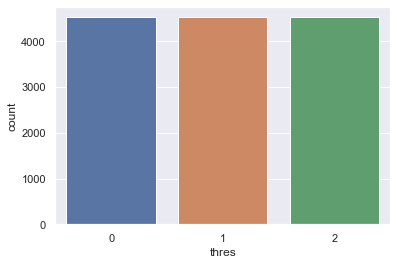

In [48]:
sns.countplot(x='thres', data=oversampled_train)

In [49]:
X.columns

Index(['sss', 'sst', 'wind_spd', 'year', 'day', 'sss_change', 'wind_change',
       'mnth_sin', 'mnth_cos', 'differential', 'hour_Day', 'hour_Night'],
      dtype='object')

In [84]:
import warnings 
warnings.filterwarnings('ignore')

X = new_enc2[['sss','sst','wind_spd','sss_change','wind_change','differential','temp_change']]
y= new_enc2['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_trainX, oversampled_trainY = sm.fit_sample(oversampled_trainX, oversampled_trainY)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns
oversampled_train.columns = ['thres','sss','sst','wind_spd','sss_change','wind_change','differential','temp_change']

new_X = oversampled_train.drop('thres',axis=1)
new_y = oversampled_train['thres']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42)

log = LogisticRegression()
rb = RobustScaler()
steps = [('scaler',rb), ('log', log)]
pipe = Pipeline(steps)
parameters = {'log__C': [1, 10, 50, 100], 'log__multi_class': ['multinomial','auto'],
               'log__solver': ['lbfgs','sag','saga','newton-cg'], 'log__max_iter': [100, 200,500],}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5)

grid.fit(new_X_train, new_y_train)
print("score = %3.4f" %(grid.score(new_X_test,new_y_test)))
print(grid.best_params_)

from sklearn.metrics import confusion_matrix
pred = grid.best_estimator_.predict(new_X_test)
print(confusion_matrix(new_y_test, pred))

score = 0.8298
{'log__C': 100, 'log__max_iter': 100, 'log__multi_class': 'multinomial', 'log__solver': 'newton-cg'}
[[ 966  405   15]
 [ 216 1117    0]
 [   0   58 1300]]


In [85]:
print("score = %3.4f" %(grid.score(X_test,y_test)))
pred1 = grid.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred1))

score = 0.7005
[[3176 1314   40]
 [   5   14    5]
 [   1    3    9]]


In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

sm = SMOTE(random_state=42)
#sm = ADASYN(random_state=12, n_neighbors=9)

X = new_enc[['sss', 'sst', 'wind_spd', 'year', 'day', 'sss_change', 'wind_change',
       'mnth_sin', 'mnth_cos', 'differential', 'hour_Day', 'hour_Night','temp_change']]
y=new_enc['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
oversampled_trainX, oversampled_trainY = sm.fit_sample(oversampled_trainX, oversampled_trainY)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns
oversampled_train.columns = ['thres','sss', 'sst', 'wind_spd', 'year', 'day', 'sss_change', 'wind_change',
       'mnth_sin', 'mnth_cos', 'differential', 'hour_Day', 'hour_Night', 'temp_change']


new_X = oversampled_train.drop('thres',axis=1)
new_y = oversampled_train['thres']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.3, random_state=42)

steps1 = [('scaler', RobustScaler()), ('forest',  XGBClassifier(random_state=42, tree_method='hist',))] 

pipeline1 = Pipeline(steps1)

parameters1 = {'forest__n_estimators':[200,500], 'forest__min_samples_split':[2,3],
               'forest__booster':['gbtree','dart'],'forest__grow_policy':['lossguide','depthwise'],} 
    
grid1 = GridSearchCV(pipeline1, param_grid=parameters1, cv=3)

grid1.fit(new_X_train, new_y_train)
print("score = %3.4f" %(grid1.score(new_X_test,new_y_test)))
print(grid1.best_params_)
pred1 = grid1.best_estimator_.predict(new_X_test)
print(confusion_matrix(new_y_test, pred1))

print("score = %3.4f" %(grid1.score(X_test,y_test)))

pred2 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

score = 0.9980
{'forest__booster': 'gbtree', 'forest__grow_policy': 'lossguide', 'forest__min_samples_split': 2, 'forest__n_estimators': 500}
[[1378    7    1]
 [   0 1357    0]
 [   0    0 1334]]
score = 0.9891
[[4504   24    2]
 [  13    7    4]
 [   5    2    6]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4530
           1       0.21      0.29      0.25        24
           2       0.50      0.46      0.48        13

    accuracy                           0.99      4567
   macro avg       0.57      0.58      0.57      4567
weighted avg       0.99      0.99      0.99      4567



In [54]:
print("score = %3.4f" %(grid1.score(X_test,y_test)))

pred2 = grid1.best_estimator_.predict(X_test)
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

score = 0.9891
[[4504   24    2]
 [  13    7    4]
 [   5    2    6]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4530
           1       0.21      0.29      0.25        24
           2       0.50      0.46      0.48        13

    accuracy                           0.99      4567
   macro avg       0.57      0.58      0.57      4567
weighted avg       0.99      0.99      0.99      4567



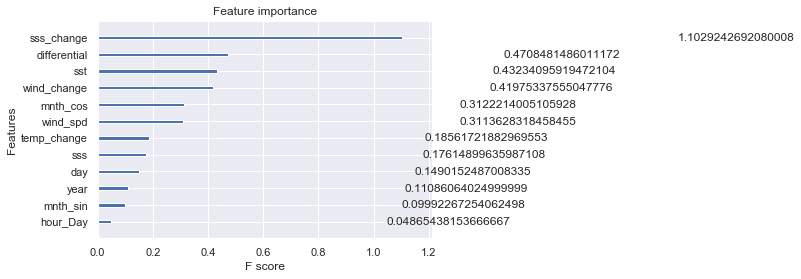

In [55]:
xgb1 = XGBClassifier(booster= 'gbtree', grow_policy= 'lossguide', min_samples_split= 2, n_estimators= 500)
xgb1.fit(X_train, y_train)
xgboost.plot_importance(xgb1, importance_type='gain')

XGBoost took forever with the gridsearch-- fast, good results can be drawn from a quick lgbm query

In [95]:
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error, accuracy_score
from imblearn.over_sampling import ADASYN


sm = SMOTE(random_state=42)
#sm = ADASYN(random_state=12, n_neighbors=9)

X = new_enc2[['sss','sst','wind_spd','sss_change','wind_change','differential','temp_change']]
y=new_enc2['thres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train, y_train)
#oversampled_trainX, oversampled_trainY = sm.fit_sample(oversampled_trainX, oversampled_trainY)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns
oversampled_train.columns = ['thres','sss','sst','wind_spd','sss_change','wind_change','differential','temp_change']

new_X = oversampled_train.drop('thres',axis=1)
new_y = oversampled_train['thres']
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.35, random_state=42, stratify=new_y)

# create dataset for lightgbm
lgb_train = lgb.Dataset(new_X_train, new_y_train)
lgb_eval = lgb.Dataset(new_X_test, new_y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'dart',
    "num_class" : 3,
    'objective': 'multiclass',
    'metric': {'multi_error', 'multi_logloss'},
    'num_leaves': 32,
    'learning_rate': 0.015,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'bagging_seed': 1500,
    'verbose': 0,
    'predict_contrib':True
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=100)


print('Starting predicting...')
# predict
y_pred = np.argmax(gbm.predict(new_X_test, num_iteration=gbm.best_iteration),axis=1)
# eval
print(confusion_matrix(new_y_test, y_pred))
print(classification_report(new_y_test,y_pred))

print('\n Testing on the original set...\n')
test_y_pred = np.argmax(gbm.predict(X_test, num_iteration=gbm.best_iteration),axis=1)
print(confusion_matrix(y_test, test_y_pred))
print(classification_report(y_test,test_y_pred))

acc1 = accuracy_score(y_test, test_y_pred)
print('Accuracy of SPURS1:', acc1)

Starting training...
[1]	valid_0's multi_logloss: 1.07845	valid_0's multi_error: 0.0363675
[2]	valid_0's multi_logloss: 1.05876	valid_0's multi_error: 0.0327938
[3]	valid_0's multi_logloss: 1.04081	valid_0's multi_error: 0.0327938
[4]	valid_0's multi_logloss: 1.02247	valid_0's multi_error: 0.0285894
[5]	valid_0's multi_logloss: 1.00411	valid_0's multi_error: 0.0285894
[6]	valid_0's multi_logloss: 0.986503	valid_0's multi_error: 0.0269077
[7]	valid_0's multi_logloss: 0.969365	valid_0's multi_error: 0.0260668
[8]	valid_0's multi_logloss: 0.975422	valid_0's multi_error: 0.0264873
[9]	valid_0's multi_logloss: 0.958765	valid_0's multi_error: 0.0264873
[10]	valid_0's multi_logloss: 0.942017	valid_0's multi_error: 0.0269077
[11]	valid_0's multi_logloss: 0.92573	valid_0's multi_error: 0.0256464
[12]	valid_0's multi_logloss: 0.931566	valid_0's multi_error: 0.0264873
[13]	valid_0's multi_logloss: 0.915904	valid_0's multi_error: 0.025226
[14]	valid_0's multi_logloss: 0.90102	valid_0's multi_error

[126]	valid_0's multi_logloss: 0.536549	valid_0's multi_error: 0.0184991
[127]	valid_0's multi_logloss: 0.528822	valid_0's multi_error: 0.0182888
[128]	valid_0's multi_logloss: 0.532214	valid_0's multi_error: 0.0182888
[129]	valid_0's multi_logloss: 0.524608	valid_0's multi_error: 0.0182888
[130]	valid_0's multi_logloss: 0.517711	valid_0's multi_error: 0.0182888
[131]	valid_0's multi_logloss: 0.520997	valid_0's multi_error: 0.0182888
[132]	valid_0's multi_logloss: 0.513472	valid_0's multi_error: 0.0180786
[133]	valid_0's multi_logloss: 0.506167	valid_0's multi_error: 0.0180786
[134]	valid_0's multi_logloss: 0.510037	valid_0's multi_error: 0.0180786
[135]	valid_0's multi_logloss: 0.502817	valid_0's multi_error: 0.0180786
[136]	valid_0's multi_logloss: 0.507104	valid_0's multi_error: 0.0180786
[137]	valid_0's multi_logloss: 0.5106	valid_0's multi_error: 0.0178684
[138]	valid_0's multi_logloss: 0.503289	valid_0's multi_error: 0.0178684
[139]	valid_0's multi_logloss: 0.496168	valid_0's mul

[247]	valid_0's multi_logloss: 0.332714	valid_0's multi_error: 0.0170275
[248]	valid_0's multi_logloss: 0.33559	valid_0's multi_error: 0.0172378
[249]	valid_0's multi_logloss: 0.33799	valid_0's multi_error: 0.0172378
[250]	valid_0's multi_logloss: 0.333582	valid_0's multi_error: 0.0168173
[251]	valid_0's multi_logloss: 0.336227	valid_0's multi_error: 0.0168173
[252]	valid_0's multi_logloss: 0.338715	valid_0's multi_error: 0.0168173
[253]	valid_0's multi_logloss: 0.33436	valid_0's multi_error: 0.0166071
[254]	valid_0's multi_logloss: 0.33021	valid_0's multi_error: 0.0166071
[255]	valid_0's multi_logloss: 0.326138	valid_0's multi_error: 0.0168173
[256]	valid_0's multi_logloss: 0.322031	valid_0's multi_error: 0.0166071
[257]	valid_0's multi_logloss: 0.317829	valid_0's multi_error: 0.0166071
[258]	valid_0's multi_logloss: 0.313662	valid_0's multi_error: 0.0166071
[259]	valid_0's multi_logloss: 0.316138	valid_0's multi_error: 0.0166071
[260]	valid_0's multi_logloss: 0.318885	valid_0's multi

[363]	valid_0's multi_logloss: 0.228982	valid_0's multi_error: 0.0170275
[364]	valid_0's multi_logloss: 0.230557	valid_0's multi_error: 0.0170275
[365]	valid_0's multi_logloss: 0.227947	valid_0's multi_error: 0.0172378
[366]	valid_0's multi_logloss: 0.229574	valid_0's multi_error: 0.0172378
[367]	valid_0's multi_logloss: 0.231384	valid_0's multi_error: 0.0172378
[368]	valid_0's multi_logloss: 0.22867	valid_0's multi_error: 0.0172378
[369]	valid_0's multi_logloss: 0.230116	valid_0's multi_error: 0.0172378
[370]	valid_0's multi_logloss: 0.22745	valid_0's multi_error: 0.0172378
[371]	valid_0's multi_logloss: 0.229095	valid_0's multi_error: 0.0172378
[372]	valid_0's multi_logloss: 0.226388	valid_0's multi_error: 0.017448
[373]	valid_0's multi_logloss: 0.223878	valid_0's multi_error: 0.017448
[374]	valid_0's multi_logloss: 0.221387	valid_0's multi_error: 0.017448
[375]	valid_0's multi_logloss: 0.218837	valid_0's multi_error: 0.017448
[376]	valid_0's multi_logloss: 0.22032	valid_0's multi_er

[478]	valid_0's multi_logloss: 0.144443	valid_0's multi_error: 0.0149254
[479]	valid_0's multi_logloss: 0.145452	valid_0's multi_error: 0.0149254
[480]	valid_0's multi_logloss: 0.144002	valid_0's multi_error: 0.0149254
[481]	valid_0's multi_logloss: 0.142478	valid_0's multi_error: 0.0149254
[482]	valid_0's multi_logloss: 0.140942	valid_0's multi_error: 0.0145049
[483]	valid_0's multi_logloss: 0.139443	valid_0's multi_error: 0.0142947
[484]	valid_0's multi_logloss: 0.137997	valid_0's multi_error: 0.0145049
[485]	valid_0's multi_logloss: 0.138872	valid_0's multi_error: 0.0142947
[486]	valid_0's multi_logloss: 0.137403	valid_0's multi_error: 0.0145049
[487]	valid_0's multi_logloss: 0.136071	valid_0's multi_error: 0.0142947
[488]	valid_0's multi_logloss: 0.134694	valid_0's multi_error: 0.0142947
[489]	valid_0's multi_logloss: 0.133323	valid_0's multi_error: 0.0142947
[490]	valid_0's multi_logloss: 0.134221	valid_0's multi_error: 0.0142947
[491]	valid_0's multi_logloss: 0.135101	valid_0's m

In [330]:
pred_df = pd.DataFrame(test_y_pred)
y_test_l = pd.DataFrame(y_test)
y_test_l.reset_index(inplace=True)
exam = pd.concat([y_test_l,pred_df], axis=1, join='outer', ignore_index=True)
exam.columns = ['index','true','predicted']
exam['compare'] = exam['predicted'] - exam['true']
two = exam[(exam['compare'] == 2)]

In [347]:
print(two.shape)
two

(18, 4)


,index,true,predicted,compare
23,8517,0,2,2
501,8953,0,2,2
583,4309,0,2,2
786,8518,0,2,2
926,5602,0,2,2
967,1658,0,2,2
1073,8604,0,2,2
1263,1663,0,2,2
2212,3398,0,2,2
2514,4328,0,2,2


In [357]:
new_enc.drop(['cum_precip3','cum_precip6','time','new_time','month'], axis=1).iloc[wrong]

,sss,sst,wind_spd,wind_dir,precip,year,day,sss_change,wind_change,season_Fall,season_Spring,season_Summer,season_Winter,hour_Day,hour_Night,thres,temp_change,Seasons
8517,37.386309,26.316097,6.968589,-152.761864,0.0,2013,4,-0.035241,0.398378,1,0,0,0,1,0,0,-0.025739,Fall
8953,36.949342,27.017892,2.173421,-134.191256,0.0,2013,22,-0.086644,0.762169,1,0,0,0,0,1,0,-0.098414,Fall
4309,37.342629,22.846768,9.935800,75.844093,0.0,2013,13,-0.009327,1.471885,0,1,0,0,1,0,0,-0.016113,Spring
8518,37.345725,26.267317,7.029282,-153.342167,0.0,2013,4,-0.040585,0.060693,1,0,0,0,0,1,0,-0.048780,Fall
5602,37.385337,23.901741,9.211611,41.325167,0.0,2013,6,-0.042103,1.729966,0,1,0,0,1,0,0,0.024572,Spring
1658,37.061084,24.714721,0.882536,131.666064,0.6,2012,22,-0.239498,-2.623343,1,0,0,0,0,1,0,-0.099778,Fall
8604,37.450549,26.074975,7.936044,-175.061867,0.0,2013,8,-0.039626,-0.180100,1,0,0,0,1,0,0,-0.018281,Fall
1663,37.357876,24.637357,3.097390,56.814136,0.0,2012,23,-0.094773,0.395912,1,0,0,0,0,1,0,-0.056671,Fall
3398,37.402649,23.384749,8.924957,125.361869,0.0,2013,3,-0.006183,0.260398,0,0,0,1,1,0,0,-0.010668,Winter
4328,37.395511,22.827816,11.861507,-2.651278,0.0,2013,14,-0.006468,3.953028,0,1,0,0,0,1,0,-0.018058,Spring


__And finally, testing the fitted model on our original test set__

In [223]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, test_y_pred)
print('Accuracy of SPURS1:', acc)
print(confusion_matrix(y_test, test_y_pred))
print(classification_report(y_test, test_y_pred))

Accuracy of SPURS1: 0.9706204379562043
[[5294  124   18]
 [  10   14    4]
 [   0    5   11]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      5436
           1       0.10      0.50      0.16        28
           2       0.33      0.69      0.45        16

   micro avg       0.97      0.97      0.97      5480
   macro avg       0.48      0.72      0.53      5480
weighted avg       0.99      0.97      0.98      5480



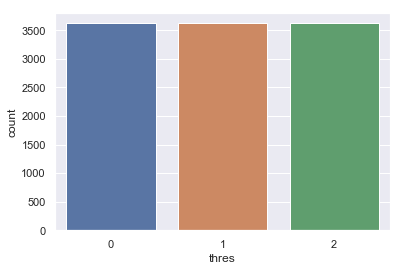

In [213]:
sns.countplot(data=oversampled_train, x='thres')

In [233]:
oversampled_train['thres'].value_counts()

2    4530
1    4530
0    4530
Name: thres, dtype: int64

0    4530
1      24
2      13
Name: thres, dtype: int64


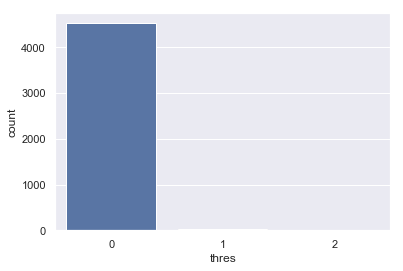

In [234]:
print(y_test.value_counts())
sns.countplot(x=y_test)

... all of that imbalance and we still get relatively great results with oversampling